3. Support vector machines.

Exercise 6: One versus all MNIST

First Part.

In [1]:
###    Import all the imports that we need
import pandas as pd
import numpy as np
from sklearn import svm

In [2]:
###    Read the train data with pandas
data_train_mnist = pd.read_csv("mnist_train.csv")
data_test_mnist = pd.read_csv("mnist_test.csv")

In [3]:
###    normalise the training mnist data in the part of pixel integers
data_train_mnist_normal = data_train_mnist.iloc[:,1:] / 255
###    Save the label(in 0-9 format) as 'target'
target_training = data_train_mnist.iloc[:, 0]
###    normalise the training mnist data in the part of pixel integers
data_test_mnist_normal = data_test_mnist.iloc[:,1:] / 255
###    Save the label(in 0-9 format) as 'target'
target_test = data_test_mnist.iloc[:, 0]

In [4]:
###    transfer pandas read file into numpy arrays
X = np.array(data_train_mnist_normal)
Y = np.array(target_training)

X_test = np.array(data_test_mnist_normal)
Y_test = np.array(target_test)

In [5]:
###    separate the training set and Validation set from the above numpy arrays
X_train = X[0:3000,:784]
Y_train = Y[0:3000]
X_val = X[3000:3450,:784]
Y_val = Y[3000:3450]
X_testt = X_test[0:600,:784]
Y_testt = Y_test[0:600]

In [6]:
###    Tune the parameter C and gamma to get accuracy above 95%
gamma=["scale","auto",0.05,0.02,0.01]
C = [1.3,1.2,1.1,1]
val_accuracy=[]
index=[]
for i in range(len(C)):
    for j in range(len(gamma)):
        model=svm.SVC(kernel="rbf",C=C[i],gamma=gamma[j])
        clf=model.fit(X_train,Y_train)
        accuracy=np.round(clf.score(X_val,Y_val),3)
        print(f"The validation accuracy for C = {C[i]}, gamma = {gamma[j]} is {accuracy}.")
        val_accuracy.append(accuracy)
        Index=(i,j)
        index.append(Index)
for m in range(len(val_accuracy)):
    if val_accuracy[m] == max(val_accuracy):
        indexs = index[m]
C_chosen = C[indexs[0]]
gamma_chosen = gamma[indexs[1]]
print(f"The chosen C number for rbf kernel is: {C_chosen}, the chosen gamma number for rbf kernel is {gamma_chosen}.")
print(f"The optimal accuracy obtained by tuning parameters: C and gamma is: {max(val_accuracy)}")

The validation accuracy for C = 1.3, gamma = scale is 0.944.
The validation accuracy for C = 1.3, gamma = auto is 0.902.
The validation accuracy for C = 1.3, gamma = 0.05 is 0.953.
The validation accuracy for C = 1.3, gamma = 0.02 is 0.951.
The validation accuracy for C = 1.3, gamma = 0.01 is 0.944.
The validation accuracy for C = 1.2, gamma = scale is 0.944.
The validation accuracy for C = 1.2, gamma = auto is 0.9.
The validation accuracy for C = 1.2, gamma = 0.05 is 0.953.
The validation accuracy for C = 1.2, gamma = 0.02 is 0.951.
The validation accuracy for C = 1.2, gamma = 0.01 is 0.944.
The validation accuracy for C = 1.1, gamma = scale is 0.944.
The validation accuracy for C = 1.1, gamma = auto is 0.896.
The validation accuracy for C = 1.1, gamma = 0.05 is 0.953.
The validation accuracy for C = 1.1, gamma = 0.02 is 0.951.
The validation accuracy for C = 1.1, gamma = 0.01 is 0.942.
The validation accuracy for C = 1, gamma = scale is 0.944.
The validation accuracy for C = 1, gamma

Firstly I will explain the validation method I used:

I used first 3000 examples in mnist_train.csv dataset as the training dataset for svm tuning parameters, and next 450 examples in mnist_train.csv dataset as the validation dataset for svm tuning parameters.

Secondly I will explain the tuning parameter method I used:

I prepared a gamma value set = ["scale","auto",0.05,0.02,0.01] and a C value set = [1.3,1.2,1.1,1] for tuning parameter, so there are totally 20 cases in tuning parameters, which means that every value in gamma set and every value in C set can be combined together to find the accuracy score. It should also be noted that "scale" in gamma set is the case: if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, and "auto" in gamma set is the case: if ‘auto’, uses 1 / n_features.

Thirdly I will explain the tuning parameter result I found:

When C = C_chosen = 1 and gamma = gamma_chosen = 0.05, we find the optimal validation accuracy score which is beyond 95%: 0.953.

Second Part.

Build one versus all MNIST

In [7]:
###    Here we build 10 clf models based on the svm.SVC() from sklearn
model = svm.SVC(kernel="rbf",C=C_chosen,gamma=gamma_chosen,probability=True)
Y1 = np.where(Y_train==0,1,0)
clf_1 = model.fit(X_train,Y1)
pro1 = np.array(clf_1.predict_proba(X_testt)[:,1])
Y2 = np.where(Y_train==1,1,0)
clf_2 = model.fit(X_train,Y2)
pro2 = np.array(clf_2.predict_proba(X_testt)[:,1])
Y3 = np.where(Y_train==2,1,0)
clf_3 = model.fit(X_train,Y3)
pro3 = np.array(clf_3.predict_proba(X_testt)[:,1])
Y4 = np.where(Y_train==3,1,0)
clf_4 = model.fit(X_train,Y4)
pro4 = np.array(clf_4.predict_proba(X_testt)[:,1])
Y5 = np.where(Y_train==4,1,0)
clf_5 = model.fit(X_train,Y5)
pro5 = np.array(clf_5.predict_proba(X_testt)[:,1])
Y6 = np.where(Y_train==5,1,0)
clf_6 = model.fit(X_train,Y6)
pro6 = np.array(clf_6.predict_proba(X_testt)[:,1])
Y7 = np.where(Y_train==6,1,0)
clf_7 = model.fit(X_train,Y7)
pro7 = np.array(clf_7.predict_proba(X_testt)[:,1])
Y8 = np.where(Y_train==7,1,0)
clf_8 = model.fit(X_train,Y8)
pro8 = np.array(clf_8.predict_proba(X_testt)[:,1])
Y9 = np.where(Y_train==8,1,0)
clf_9 = model.fit(X_train,Y9)
pro9 = np.array(clf_9.predict_proba(X_testt)[:,1])
Y10 = np.where(Y_train==9,1,0)
clf_10 = model.fit(X_train,Y10)
pro10 = np.array(clf_10.predict_proba(X_testt)[:,1])
Y_predict = []
for i in range(len(X_testt)):
    pro = []
    pro.append(pro1[i])
    pro.append(pro2[i])
    pro.append(pro3[i])
    pro.append(pro4[i])
    pro.append(pro5[i])
    pro.append(pro6[i])
    pro.append(pro7[i])
    pro.append(pro8[i])
    pro.append(pro9[i])
    pro.append(pro10[i])
    pro = np.array(pro)
    index = np.argmax(pro)
    Y_predict.append(index)
Y_predict = np.array(Y_predict)
print(Y_predict)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 9 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 9 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 4 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 4 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 5 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 8 8 4 2 6 0 2 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 4 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 5 1 9 6 5 2 5 7 7 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 4 1 3 8 1 0 5 1 3 1 5 0 6 1 8 5 1 4 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 7 3 7 6 1 6 2 1 4 2 8 6 1 9 5 2 5 4 4 2 8 3 5 2 4 5
 0 3 1 7 7 3 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 8 0 6 4 8 5 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 8 1
 9 7 5 4 0 8 9 9 1 0 5 2 

In [8]:
###    Now we calculate the one-versus-all test accuracy score
num = 0
for i in range(len(Y_testt)):
    if Y_testt[i] == Y_predict[i]:
        num+=1
accuracy = np.round(num/len(Y_testt),3)
print(f"The accuracy with one-vs-all scheme binary classification is: {accuracy}.")

The accuracy with one-vs-all scheme binary classification is: 0.942.


In [9]:
###    Now we visualize the one-vs-one scheme binary built-in classification
model = svm.SVC(kernel="rbf",C=C_chosen,gamma=gamma_chosen,probability=True)
clf = model.fit(X_train,Y_train)
accuracy = np.round(clf.score(X_testt,Y_testt),3)
print(f"The accuracy with built-in one-vs-one scheme binary classification is: {accuracy}.")

The accuracy with built-in one-vs-one scheme binary classification is: 0.932.


Which was the best classifier? Clearly from the test accuracy score one-vs-all scheme binary classification is the best one because it has higher test accuracy score than that of the built-in one-vs-one scheme binary classification.

Now we explore the confusion matrix to figure out which one has fewer misclassification mistakes.

Confusion Matrix for one-vs-all

In [10]:
label = [0,1,2,3,4,5,6,7,8,9]

All the diagnoal values added together for one-vs-all is: 565, which means the total number of correct classification.
The total number for misclassification in confusion matrix is: 35.


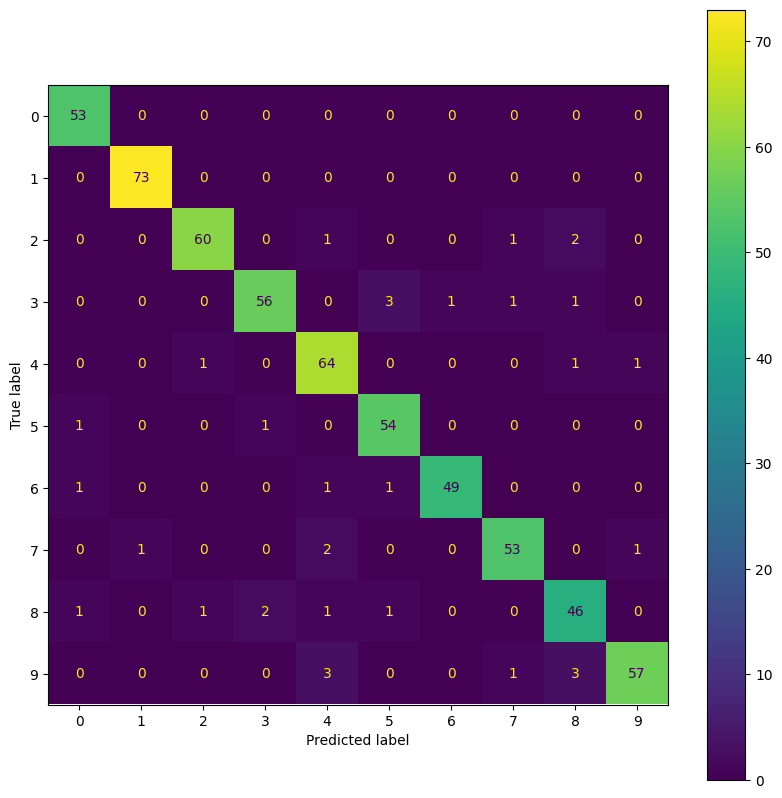

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_testt,Y_predict)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
fig,ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
b=np.trace(cm)
print(f"All the diagnoal values added together for one-vs-all is: {b}, which means the total number of correct classification.")
a=len(X_testt)-b
print(f"The total number for misclassification in confusion matrix is: {a}.")

Confusion Matrix for one-vs-one

All the diagnoal values added together for one-vs-one is: 559, which means the total number of correct classification.
The total number for misclassification in confusion matrix is: 41.


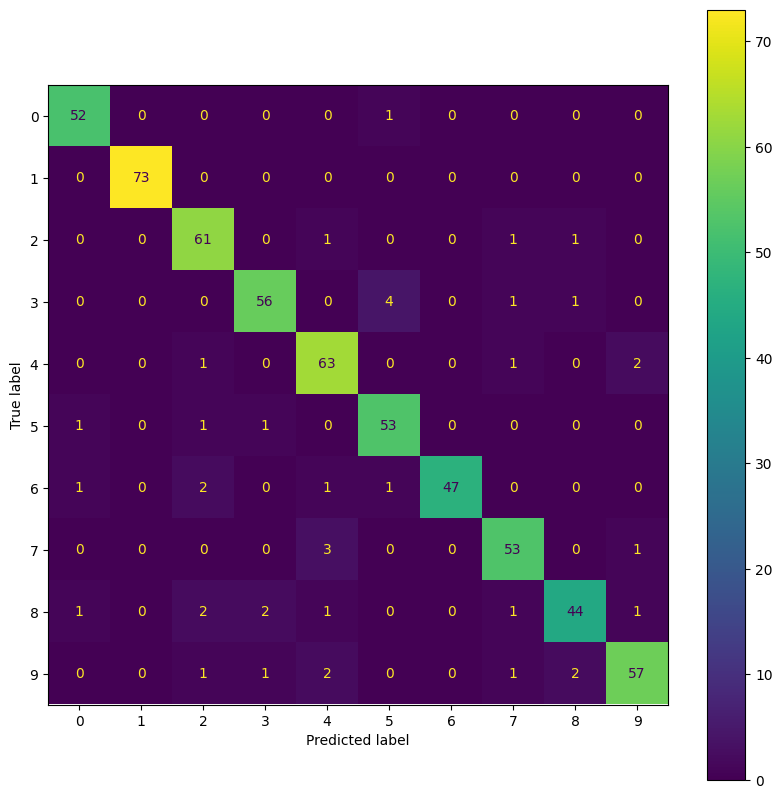

In [12]:
Y_predictt = clf.predict(X_testt)
CM = confusion_matrix(Y_testt,Y_predictt)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=label)
fig,ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
b=np.trace(CM)
print(f"All the diagnoal values added together for one-vs-one is: {b}, which means the total number of correct classification.")
a=len(X_testt)-b
print(f"The total number for misclassification in confusion matrix is: {a}.")

Hence from the graph of the two confusion matrixs respectively for one-vs-all and one-vs-one and the two values of numbers of misclassification respectively for one-vs-all and one-vs-one, it is also clear that one-vs-all is better than one-vs-one, which means one-vs-all is the best scheme binary classification.